In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과

import warnings

# Ignore all warnings (not recommended in most cases)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
building = pd.read_csv('building_info.csv')

In [5]:
building.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [6]:
df_merged = pd.merge(df, building, how = 'left', on = '건물번호')

In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      204000 non-null  object 
 14  ESS저장용량(kWh)   204000 non-null  object 
 15  PCS용량(kW)      204000 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 26.5+ MB


In [8]:
df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,-,-,-
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,-,-,-
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,-,-,-
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,-,-,-
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,-,-,-


#시간 및 날짜 분리

In [9]:
import re

In [10]:
df_merged.tail()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,-,-,-
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,-,-,-
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-
203999,100_20220824 23,100,20220824 23,20.7,NaN,0.1,95.0,NaN,NaN,540.24,호텔및리조트,57497.84,40035.23,-,-,-


In [11]:
from datetime import datetime


def hr_extractor(x):
    a = re.search('\d{2}$', x)
    return int(a[0])

def dt_extractor(x):
    date = re.search('2022\d{4}', x)
    date_format = '%Y%m%d'
    a = datetime.strptime(date[0], date_format)
    return a

In [12]:
df_merged['hours'] = df_merged['num_date_time'].apply(hr_extractor)

In [13]:
df_merged['dt'] = df_merged['num_date_time'].apply(dt_extractor)

In [17]:
df_merged['weekday'] = df_merged['dt'].apply(datetime.weekday)

In [20]:
df_merged['weekday'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [19]:
df_merged.tail()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,호텔및리조트,57497.84,40035.23,-,-,-,19,2022-08-24,2
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,호텔및리조트,57497.84,40035.23,-,-,-,20,2022-08-24,2
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-,21,2022-08-24,2
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-,22,2022-08-24,2
203999,100_20220824 23,100,20220824 23,20.7,NaN,0.1,95.0,NaN,NaN,540.24,호텔및리조트,57497.84,40035.23,-,-,-,23,2022-08-24,2


In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  object        
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        43931 non-null   float64       
 5   풍속(m/s)        203981 non-null  float64       
 6   습도(%)          203991 non-null  float64       
 7   일조(hr)         128818 non-null  float64       
 8   일사(MJ/m2)      116087 non-null  float64       
 9   전력소비량(kWh)     204000 non-null  float64       
 10  건물유형           204000 non-null  object        
 11  연면적(m2)        204000 non-null  float64       
 12  냉방면적(m2)       204000 non-null  float64       
 13  태양광용량(kW)      204000 non-null  object        
 14  ESS저장용량(kWh)   204000 non-null  object        
 15  

In [15]:
for column in df_merged:
    def unique_val(x):
        try:
            unique_val = np.unique(df_merged[x])
            return unique_val
        except:
            unique_val = np.unique(df_merged[x].apply(str))
            return unique_val
    unique = unique_val(column)
    nr_values = len(unique)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature num_date_time :204000
The number of values for feature 건물번호 :100
The number of values for feature 일시 :2040
The number of values for feature 기온(C) :263
The number of values for feature 강수량(mm) :302
The number of values for feature 풍속(m/s) :121
The number of values for feature 습도(%) :102
The number of values for feature 일조(hr) :12
The number of values for feature 일사(MJ/m2) :380
The number of values for feature 전력소비량(kWh) :51812
The number of values for feature 건물유형 :12
The number of values for feature 연면적(m2) :100
The number of values for feature 냉방면적(m2) :98
The number of values for feature 태양광용량(kW) :33
The number of values for feature ESS저장용량(kWh) :6 -- ['-' '1362' '2557' '3100' '800' '837.1']
The number of values for feature PCS용량(kW) :5 -- ['-' '1000' '300' '500' '800']
The number of values for feature hours :24
The number of values for feature dt :85


건물유형에 따라 전력사용량

In [23]:
import seaborn as sns

In [24]:
df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,-,-,-,0,2022-06-01,2
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,-,-,-,1,2022-06-01,2
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,-,-,-,2,2022-06-01,2
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,-,-,-,3,2022-06-01,2
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,-,-,-,4,2022-06-01,2


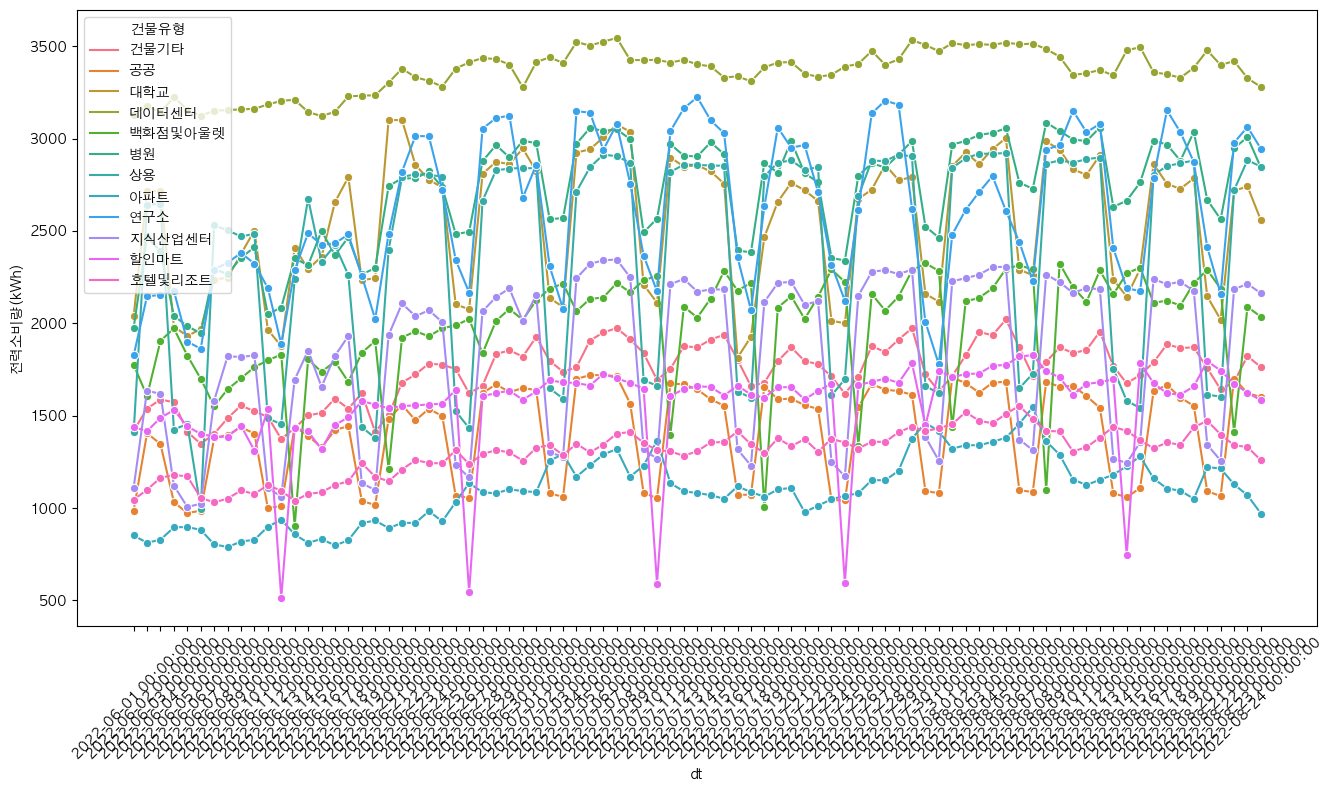

In [25]:
plt.figure(figsize = (16,8))

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

a = df_merged.groupby(['dt','건물유형'])['전력소비량(kWh)'].median().reset_index()
a['dt'] = a['dt'].apply(str)

sns.lineplot(data=a, x='dt', y='전력소비량(kWh)', hue='건물유형', marker='o')
plt.xticks(rotation = 45)
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
def encode_dataframe(df_series):
    dataframe = LabelEncoder().fit_transform(df_series)
    return dataframe

In [28]:
df_merged['건물유형'] = encode_dataframe(df_merged['건물유형'])

In [29]:
df_merged['건물유형'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
df_merged.tail(10)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
203990,100_20220824 14,100,20220824 14,24.9,NaN,1.2,76.0,0.0,NaN,1092.00,11,57497.84,40035.23,-,-,-,14,2022-08-24,2
203991,100_20220824 15,100,20220824 15,25.1,NaN,1.2,74.0,0.0,NaN,1120.32,11,57497.84,40035.23,-,-,-,15,2022-08-24,2
203992,100_20220824 16,100,20220824 16,25.6,NaN,1.4,72.0,0.0,NaN,1137.60,11,57497.84,40035.23,-,-,-,16,2022-08-24,2
203993,100_20220824 17,100,20220824 17,26.0,NaN,1.9,70.0,0.5,NaN,1173.36,11,57497.84,40035.23,-,-,-,17,2022-08-24,2
203994,100_20220824 18,100,20220824 18,25.1,NaN,1.3,74.0,0.8,NaN,1127.76,11,57497.84,40035.23,-,-,-,18,2022-08-24,2
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,11,57497.84,40035.23,-,-,-,19,2022-08-24,2
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,11,57497.84,40035.23,-,-,-,20,2022-08-24,2
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,11,57497.84,40035.23,-,-,-,21,2022-08-24,2
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,11,57497.84,40035.23,-,-,-,22,2022-08-24,2
203999,100_20220824 23,100,20220824 23,20.7,NaN,0.1,95.0,NaN,NaN,540.24,11,57497.84,40035.23,-,-,-,23,2022-08-24,2


In [31]:
def replace_hypen_null(x):
    if re.search('-', x):
        a = x.replace('-', '0')
    else:
        a = x
    return float(a)

In [32]:
missing_values = df_merged.isna().sum()

missing_cols = missing_values[missing_values > 0].index

In [33]:
for col in missing_cols:
    df_merged[col] = df_merged[col].fillna(0)

Data Type 잘못 설정된 칼럼

In [34]:
non_int_cols = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']

In [35]:
for col in non_int_cols:
    df_merged[col] = df_merged[col].apply(replace_hypen_null)

Text(0.5, 1.0, 'Sun Electricity Histogram')

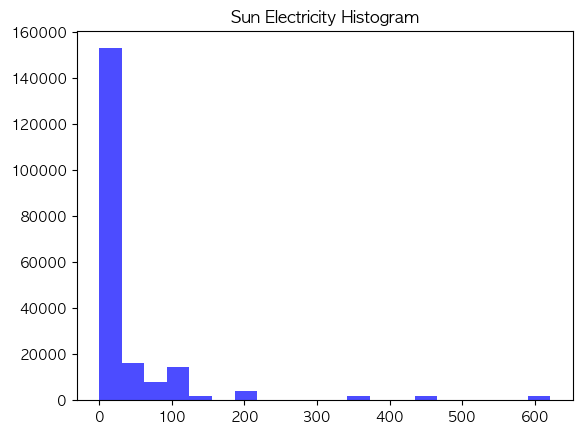

In [36]:
plt.hist(df_merged['태양광용량(kW)'], bins= 20, color = 'blue', alpha = 0.7)
plt.title('Sun Electricity Histogram')

기본 전력 사용량 분포도

Text(0.5, 1.0, '전력소비량 분포도')

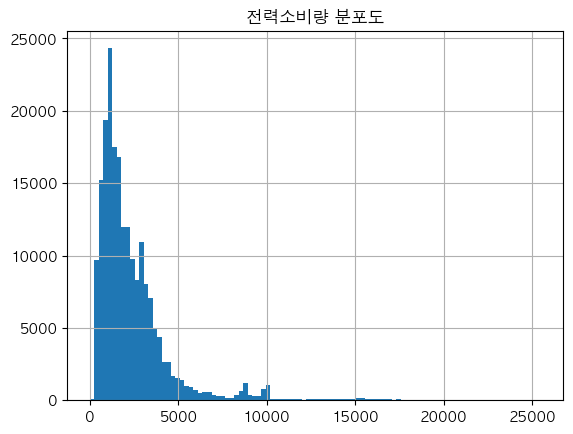

In [37]:
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
df_merged['전력소비량(kWh)'].hist(bins=100)
plt.title('전력소비량 분포도')

<AxesSubplot: xlabel='전력소비량(kWh)', ylabel='Count'>

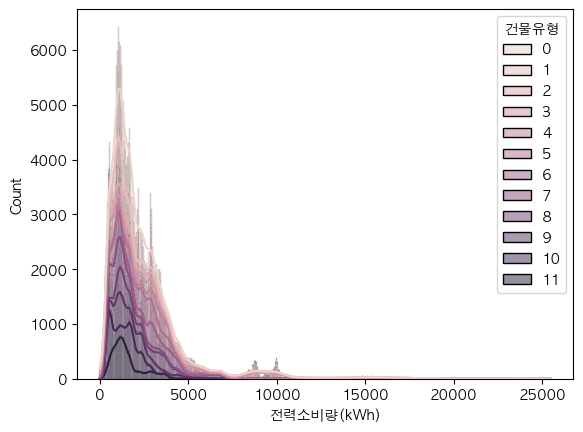

In [38]:
sns.histplot(data=df_merged, x="전력소비량(kWh)", hue="건물유형", multiple="stack", kde=True)


피쳐별 분포도 확인

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '전력소비량(kWh)'),
  Text(1, 0, '일사(MJ/m2)'),
  Text(2, 0, '기온(C)'),
  Text(3, 0, '풍속(m/s)'),
  Text(4, 0, 'hours'),
  Text(5, 0, '일조(hr)'),
  Text(6, 0, '태양광용량(kW)'),
  Text(7, 0, '냉방면적(m2)'),
  Text(8, 0, '강수량(mm)'),
  Text(9, 0, '연면적(m2)'),
  Text(10, 0, 'ESS저장용량(kWh)'),
  Text(11, 0, 'PCS용량(kW)'),
  Text(12, 0, 'weekday'),
  Text(13, 0, '습도(%)'),
  Text(14, 0, '건물유형'),
  Text(15, 0, '건물번호')])

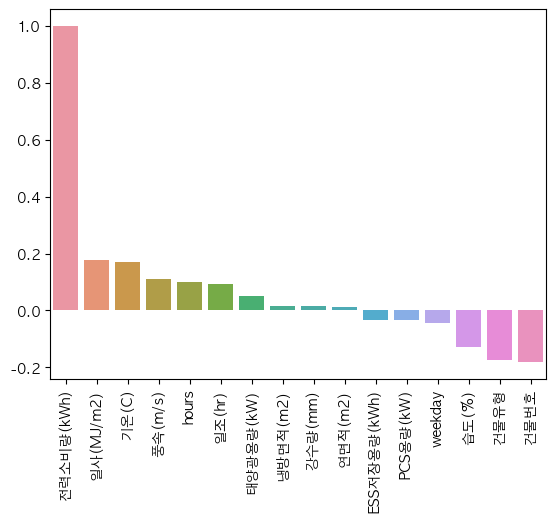

In [39]:
a = df_merged.corr()['전력소비량(kWh)'].sort_values(ascending = False)
sns.barplot(x = a.index, y = a.values)
plt.xticks(rotation = 90)

시간에 따른 전력사용량 분포도

<AxesSubplot: xlabel='hours', ylabel='전력소비량(kWh)'>

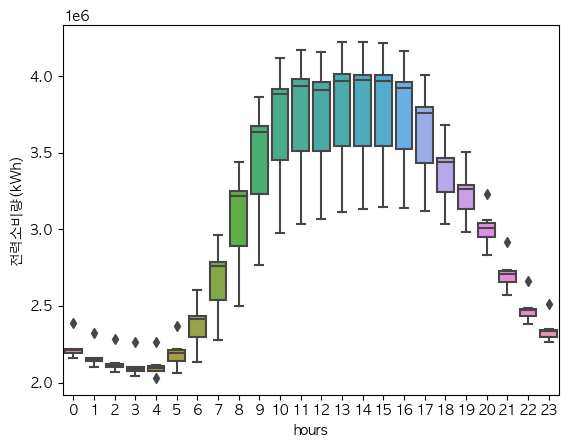

In [46]:
a = df_merged.groupby(['hours', 'weekday'])['전력소비량(kWh)'].sum().reset_index()
sns.boxplot(x = 'hours', y = '전력소비량(kWh)', data = a)

Sub Boxplots by Buidling Types

In [49]:
a = df_merged.groupby(['hours', 'weekday', '건물유형'])['전력소비량(kWh)'].sum().reset_index()

a.head()

,hours,weekday,건물유형,전력소비량(kWh)
0,0,0,0,284013.615
1,0,0,1,91462.660
2,0,0,2,423309.560
3,0,0,3,323520.060
4,0,0,4,67808.400


In [ ]:
plt.rcParams['figure.figsize'] = [20, 16]

for i in range(len(df.columns)):
    ax = fig.add_subplot(5, 5, i+1)
    plt.hist(df[df.columns[i]], bins=50)
    ax.set_title(df.columns[i])
plt.show()

In [ ]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

<AxesSubplot: xlabel='건물유형', ylabel='전력소비량(kWh)'>

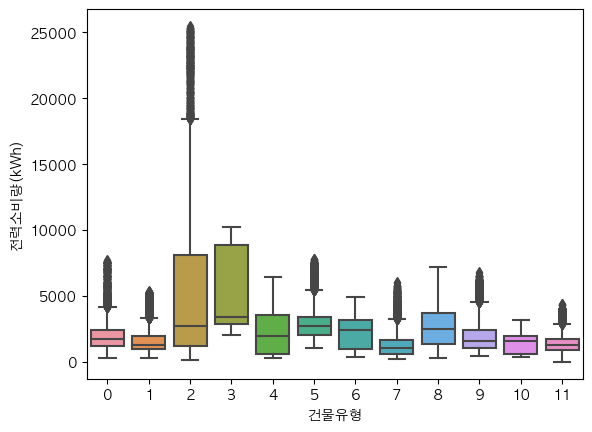

In [38]:
sns.boxplot(x = '건물유형', y = '전력소비량(kWh)', data = df_merged)

In [33]:
df['강수량(mm)'].kurt()

36.29002615296689

In [55]:
def unistats(df):
    output_df = pd.DataFrame(columns = ['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median'
                                        , '75%', 'Max', 'Std','Skew', 'Kurt'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode()[0]
                                  , df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), round(df[col].std(), 2),
                                  df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mode()[0]
                                  , '-', '-', '-', '-', '-', '-', '-',
                                  '-', '-']
    return output_df

In [56]:
df_merged.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '건물유형', '연면적(m2)', '냉방면적(m2)',
       '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', 'hours', 'dt', 'weekday'],
      dtype='object')

In [57]:
unistats(df_merged)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
num_date_time,204000,0,204000,object,False,100_20220601 00,-,-,-,-,-,-,-,-,-
건물번호,204000,0,100,int64,True,1,50.5,1,25.75,50.5,75.25,100,28.87,0.0,-1.20024
일시,204000,0,2040,object,False,20220601 00,-,-,-,-,-,-,-,-,-
기온(C),204000,0,263,float64,True,27.3,25.543524,10.1,23.4,25.7,28.1,37.1,3.78,-0.364763,0.165458
강수량(mm),204000,0,301,float64,True,0.0,0.439489,0.0,0.0,0.0,0.0,92.2,2.54,10.781857,166.767701
풍속(m/s),204000,0,120,float64,True,2.2,2.133832,0.0,1.2,2.0,2.8,13.3,1.36,1.336024,4.078141
습도(%),204000,0,102,float64,True,99.0,78.712822,0.0,69.0,81.0,91.0,100.0,15.09,-0.711085,0.191352
일조(hr),204000,0,11,float64,True,0.0,0.210679,0.0,0.0,0.0,0.3,1.0,0.36,1.379379,0.21746
일사(MJ/m2),204000,0,379,float64,True,0.0,0.605373,0.0,0.0,0.04,0.93,3.92,0.92,1.534459,1.216625
전력소비량(kWh),204000,0,51812,float64,True,1008.0,2451.036462,0.0,1085.76,1766.4,2970.0,25488.4,2440.65,3.742839,20.189499


In [47]:
from scipy.stats import f_oneway
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [50]:
f_oneway(*df_merged.loc[:,['건물번호', '전력소비량(kWh)']].values.T)

F_onewayResult(statistic=197321.96562382721, pvalue=0.0)

날씨와 전력사용도간 상관관계

In [58]:
df_merged.corr()['전력소비량(kWh)'].sort_values(ascending = False)

전력소비량(kWh)      1.000000
일사(MJ/m2)       0.177750
기온(C)           0.171190
풍속(m/s)         0.109956
hours           0.099594
일조(hr)          0.094748
태양광용량(kW)       0.052039
냉방면적(m2)        0.016444
강수량(mm)         0.015083
연면적(m2)         0.013463
ESS저장용량(kWh)   -0.031856
PCS용량(kW)      -0.033882
weekday        -0.043600
습도(%)          -0.129373
건물유형           -0.174378
건물번호           -0.180474
Name: 전력소비량(kWh), dtype: float64

In [59]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [60]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror', max_depth=6, learning_rate=0.1, n_estimators=100, random_state=2, n_jobs=-1)

In [61]:
df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,0,110634.0,39570.0,0.0,0.0,0.0,0,2022-06-01,2
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,0,110634.0,39570.0,0.0,0.0,0.0,1,2022-06-01,2
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,0.0,0.0,974.88,0,110634.0,39570.0,0.0,0.0,0.0,2,2022-06-01,2
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,0.0,0.0,953.76,0,110634.0,39570.0,0.0,0.0,0.0,3,2022-06-01,2
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,0.0,0.0,986.40,0,110634.0,39570.0,0.0,0.0,0.0,4,2022-06-01,2


In [62]:
X = df_merged.loc[:,['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '건물유형', '연면적(m2)', '냉방면적(m2)',
       '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', 'weekday', 'hours']]

y = df_merged.loc[:, '전력소비량(kWh)']

In [97]:
X = df_merged.loc[:,['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)','건물유형', '연면적(m2)', '냉방면적(m2)',
       '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', 'weekday', 'hours']]

y = df_merged.loc[:, '전력소비량(kWh)']

In [98]:
X.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),weekday,hours
0,1,18.6,0.0,0.9,42.0,0,110634.0,39570.0,0.0,0.0,0.0,2,0
1,1,18.0,0.0,1.1,45.0,0,110634.0,39570.0,0.0,0.0,0.0,2,1
2,1,17.7,0.0,1.5,45.0,0,110634.0,39570.0,0.0,0.0,0.0,2,2
3,1,16.7,0.0,1.4,48.0,0,110634.0,39570.0,0.0,0.0,0.0,2,3
4,1,18.4,0.0,2.8,43.0,0,110634.0,39570.0,0.0,0.0,0.0,2,4


In [99]:
y.head()

0    1085.28
1    1047.36
2     974.88
3     953.76
4     986.40
Name: 전력소비량(kWh), dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [67]:
from sklearn.model_selection  import GridSearchCV

In [68]:
params_grid = {
    'learning_rate':[0.1, 0.01],
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3,5,6],
    'subsample' : [0.8, 1.0],
    'colsample_bytree':[0.8, 1.0]
}

In [69]:
reg = XGBRegressor()

In [102]:
xgb_model = XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.1,  # Step size at each boosting round
    max_depth=3,  # Maximum depth of each tree
    random_state=2,
    subsample = 1.0,
    colsample_bytree = 1.0
)

In [103]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

In [104]:
y_pred = xgb_model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

In [107]:
print("RMSE: %0.2f" % (rmse))

RMSE: 429.69


In [115]:
y_test

5621        785.16
178641     1593.00
174374     1646.28
143431     2001.12
2085       1703.88
            ...   
80428       406.80
55000     17091.20
25012      2591.52
141659     7007.69
39818      1092.48
Name: 전력소비량(kWh), Length: 51000, dtype: float64

In [128]:
y_pred

array([ 946.3242, 1649.0667, 1835.2012, ..., 2660.697 , 5428.157 ,
       1093.3638], dtype=float32)

In [108]:
df_merged['전력소비량(kWh)'].describe()

count    204000.000000
mean       2451.036462
std        2440.648858
min           0.000000
25%        1085.760000
50%        1766.400000
75%        2970.000000
max       25488.400000
Name: 전력소비량(kWh), dtype: float64

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

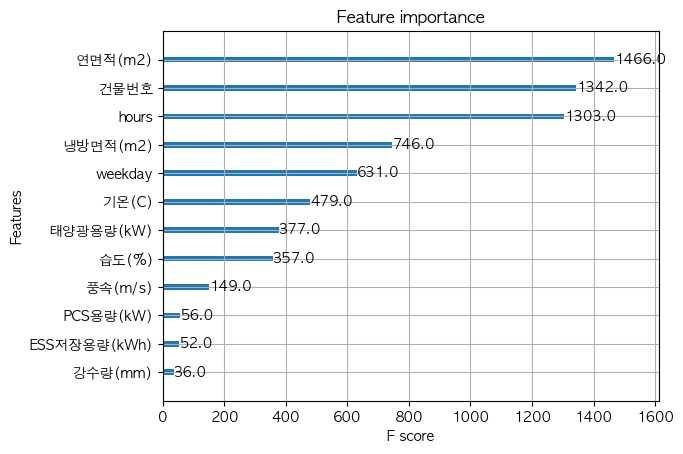

In [109]:
from xgboost import plot_importance

plot_importance(xgb_model)

In [157]:
submission_df = pd.read_csv('test.csv')

In [158]:
submission_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [131]:
submission_df_merged = pd.merge(submission_df, building, how = 'left', on = '건물번호')

In [132]:
submission_df_merged['hours'] = df_merged['num_date_time'].apply(hr_extractor)
submission_df_merged['dt'] = df_merged['num_date_time'].apply(dt_extractor)
submission_df_merged['weekday'] = df_merged['dt'].apply(datetime.weekday)

In [134]:
submission_df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,건물기타,110634.0,39570.0,-,-,-,0,2022-06-01,2
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,건물기타,110634.0,39570.0,-,-,-,1,2022-06-01,2
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,건물기타,110634.0,39570.0,-,-,-,2,2022-06-01,2
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,건물기타,110634.0,39570.0,-,-,-,3,2022-06-01,2
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,건물기타,110634.0,39570.0,-,-,-,4,2022-06-01,2


In [135]:
submission_df_merged['건물유형'] = encode_dataframe(submission_df_merged['건물유형'])

In [136]:
submission_df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,0,110634.0,39570.0,-,-,-,0,2022-06-01,2
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,0,110634.0,39570.0,-,-,-,1,2022-06-01,2
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,0,110634.0,39570.0,-,-,-,2,2022-06-01,2
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,0,110634.0,39570.0,-,-,-,3,2022-06-01,2
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,0,110634.0,39570.0,-,-,-,4,2022-06-01,2


In [140]:
X.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),weekday,hours
0,1,23.5,0.0,2.2,72,0,110634.0,39570.0,-,-,-,2,0
1,1,23.0,0.0,0.9,72,0,110634.0,39570.0,-,-,-,2,1
2,1,22.7,0.0,1.5,75,0,110634.0,39570.0,-,-,-,2,2
3,1,22.1,0.0,1.3,78,0,110634.0,39570.0,-,-,-,2,3
4,1,21.8,0.0,1.0,77,0,110634.0,39570.0,-,-,-,2,4


In [141]:
missing_values = submission_df_merged.isna().sum()
missing_cols = missing_values[missing_values > 0].index

In [142]:
for col in missing_cols:
    submission_df_merged[col] = submission_df_merged[col].fillna(0)
non_int_cols = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
for col in non_int_cols:
    submission_df_merged[col] = submission_df_merged[col].apply(replace_hypen_null)

In [143]:
submission_df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,0,110634.0,39570.0,0.0,0.0,0.0,0,2022-06-01,2
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,0,110634.0,39570.0,0.0,0.0,0.0,1,2022-06-01,2
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,0,110634.0,39570.0,0.0,0.0,0.0,2,2022-06-01,2
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,0,110634.0,39570.0,0.0,0.0,0.0,3,2022-06-01,2
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,0,110634.0,39570.0,0.0,0.0,0.0,4,2022-06-01,2


In [144]:
X = submission_df_merged.loc[:,['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)','건물유형', '연면적(m2)', '냉방면적(m2)',
       '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)', 'weekday', 'hours']]

In [156]:
X.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),weekday,hours
0,1,23.5,0.0,2.2,72,0,110634.0,39570.0,0.0,0.0,0.0,2,0
1,1,23.0,0.0,0.9,72,0,110634.0,39570.0,0.0,0.0,0.0,2,1
2,1,22.7,0.0,1.5,75,0,110634.0,39570.0,0.0,0.0,0.0,2,2
3,1,22.1,0.0,1.3,78,0,110634.0,39570.0,0.0,0.0,0.0,2,3
4,1,21.8,0.0,1.0,77,0,110634.0,39570.0,0.0,0.0,0.0,2,4


In [146]:
y_pred = xgb_model.predict(X)

In [150]:
y_pred

array([1706.715  , 1613.7485 , 1604.0492 , ...,  635.3557 ,  480.04526,
        313.0832 ], dtype=float32)

In [153]:
submission_df_merged['answer'] = y_pred

In [160]:
submission_df_merged.drop(['전력소비량(kWh)'], axis = 1, inplace= True)

In [161]:
submission_df_merged.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hours,dt,weekday,answer
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,0,110634.0,39570.0,0.0,0.0,0.0,0,2022-06-01,2,1706.714966
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,0,110634.0,39570.0,0.0,0.0,0.0,1,2022-06-01,2,1613.748535
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,0,110634.0,39570.0,0.0,0.0,0.0,2,2022-06-01,2,1604.049194
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,0,110634.0,39570.0,0.0,0.0,0.0,3,2022-06-01,2,1506.538208
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,0,110634.0,39570.0,0.0,0.0,0.0,4,2022-06-01,2,1383.171753


In [162]:
final_submission = submission_df_merged.loc[:, ['num_date_time', 'answer']]

In [163]:
final_submission.to_csv('final_submission.csv', index=False)